In [8]:
from IPython.display import Image
import numpy as np
import os
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [9]:
iris = load_iris()
print("Type iris : %s"%type(iris))
print(iris['target_names'])
print('Label (20 premiers):', iris['target'][0:20])
print('Features (20 premiers):\n',iris['data'][0:20])
print('Description:\n',iris['DESCR'])

Type iris : <class 'sklearn.utils._bunch.Bunch'>
['setosa' 'versicolor' 'virginica']
Label (20 premiers): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Features (20 premiers):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]]
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                -

In [10]:
iris.feature_names=['Longueur Sépale (cm)', 'Largeur Sépale (cm)', 'Longueur Pétale (cm)', 'Largeur Pétale (cm)']
features = iris.data # Longueur et largeur petales/sepales
labels = iris.target
print(iris.feature_names)
print(features[0:3,:])
print(iris.target_names)
print(labels[0:3])

['Longueur Sépale (cm)', 'Largeur Sépale (cm)', 'Longueur Pétale (cm)', 'Largeur Pétale (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0]


In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(features, labels)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [12]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

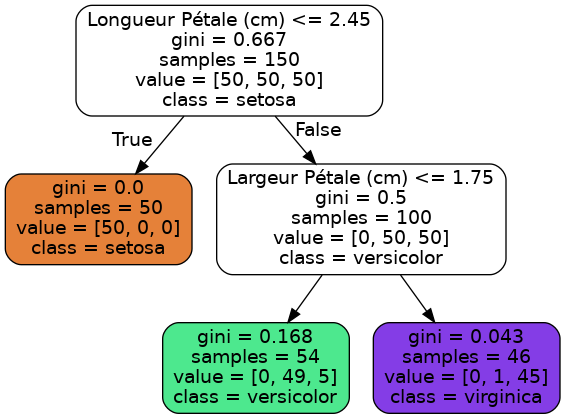

In [13]:
#appel à la fonction dot de graphwiz
os.system("dot -Tpng iris_tree.dot -o iris_tree.png")
#Affichage de l'image créée
Image("iris_tree.png")

In [14]:
ma_nouvelle_fleur=[2,2,5, 1.5]
print('Probabilités :',np.round(tree_clf.predict_proba([ma_nouvelle_fleur]),2))
print('N° classe :',tree_clf.predict([ma_nouvelle_fleur]))
print('Classe :',iris.target_names[tree_clf.predict([ma_nouvelle_fleur])])


Probabilités : [[0.   0.91 0.09]]
N° classe : [1]
Classe : ['versicolor']
